# Исследование объявлений о продаже объектов недвижимости

Задача: провести исследование архива объявлений о продаже квартир и определить рыночную стоимость. Это позволит построить автоматизированную систему, которая сможет отследить аномалии и выявить мошенническую деятельность. 

## Оглавление
1. [Общая информация](#start)
2. [Предобработка данных](#preprocessing)
   * [Обработка пропусков](#null)
   * [Обработка дубликатов](#duplicates)
   * [Замена типов данных](#replace_type)
3. [Добавление дополнительных параметров](#params_add)
4. [Исследовательский анализ данных](#research)
   * [Изучение параметров](#params)
   * [Изучение времени продаж квартиры](#time_sale)
   * [Очистка данных](#clean_data)
   * [Исследование факторов, влияющих на стоимость квартир](#factors_price)
   * [Исследование стоимости квартир в населенных пунктах](#price_locat)
   * [Исследование зависимости стоимости м2 от расстояния до центра](#price_center)
   * [Исследование сегмента квартир в центре](#research_center)
5. [Общий вывод](#conclusion)

<a id='start'></a>
## Общая информация
Импортируем библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем файл с информацией и сохраним его в переменной df. Просмотрим первые 10 строк датафрейма и общую информацию о данных таблицы. 

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
#Увеличим вывод количества столбцов
pd.options.display.max_columns = 35
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В таблице 23698 наблюдений. Практически во всех столбцах имеются пропущенные значения, кроме: total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, open_plan. Причем не единичные случаи, а в большом количестве. Причиной большого количество пропущенных значений могут быть проблемы с выгрузкой или отсутствие информации. На это стоит обратить внимание. Название столбцов указаны корректно (латиницей, в одном регистре, без пробелов)<br>
Описание данных:

- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах(м²)
- floor — этаж
- is_apartment — апартаменты
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- open_plan — свободная планировка (булев тип)
- studio — квартира-студия (булев тип)<br>
Имеются данные, которые могут быть недостоверными. Например, привлекает внимание количество комнат - 0 и 19, высота потолков -100, площадь кухни 1,3 и 112.

<a id='preprocessing'></a>
## Предобработка данных

<a id='null'></a>
### Обработка пропусков


In [9]:
df.corr()['living_area'].sort_values(ascending=False)


living_area            1.000000
total_area             0.939537
rooms                  0.845977
last_price             0.566492
kitchen_area           0.428674
parks_around3000       0.184453
ponds_around3000       0.148933
days_exposition        0.142454
total_images           0.104780
ceiling_height         0.090650
is_apartment           0.026969
balcony               -0.014772
open_plan             -0.033711
parks_nearest         -0.050167
studio                -0.056231
airports_nearest      -0.057912
ponds_nearest         -0.081674
floor                 -0.097210
floors_total          -0.169311
cityCenters_nearest   -0.231368
Name: living_area, dtype: float64

Найдем соотношение жилой площади к общей (наиболее взаимосвязанные величины) и заполним пропуски в разрезе количества комнат. Площадь кухни вычислим как разность между общей и жилой площадью. Ввиду малой дисперсии в параметре высота потолков, мы можем использовать медиану для обработки пропусков.
<br>Заполняем пропущенные значения в указанных столбцах, чтобы можно было им присвоить целочисленный тип и повысить точность вычислений наиболее важных для нас данных.

In [10]:
#Заполняем пропуски высоты потолков
df['ceiling_height'] =  df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Отсутствующих значений в столбце -', df['ceiling_height'].isna().sum())

Отсутствующих значений в столбце - 0


In [11]:
#Заполняем пропуски жилой площади
df['ratio_living_total'] = df['living_area'] / df['total_area']
mean_ratio_living = df.pivot_table(index='rooms', values='ratio_living_total')
for i in mean_ratio_living.index:
    df.loc[df['rooms'] == i, 'living_area'] =  df.loc[df['rooms'] == i, 'living_area'].fillna(df.loc[i, 'total_area'] * mean_ratio_living.loc[i, 'ratio_living_total'])
print('Отсутствующих значений в столбце -', df['living_area'].isna().sum())
mean_ratio_living

Отсутствующих значений в столбце - 0


,ratio_living_total
rooms,
0,0.685467
1,0.485989
2,0.579287
3,0.625302
4,0.646489
5,0.641377
6,0.668819
7,0.657981
8,0.667001


In [12]:
#Заполняем пропуски площади кухни
df['kitchen_area'] = df.query('studio == True')['kitchen_area'].fillna(0)

In [13]:
df['kitchen_area'] = abs(df['kitchen_area'].fillna(df['total_area'] - df['living_area']))
df['kitchen_area'].isna().sum()


0

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text xticklabel objects>)

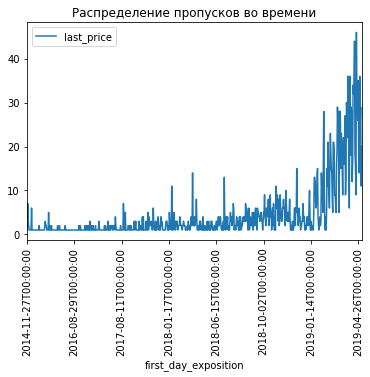

In [14]:
# Изучаем пропуски в столбце длительность продажи в разрезе даты размещения объявления
df.query('days_exposition != days_exposition').pivot_table(index='first_day_exposition', values='last_price', aggfunc='count').plot(title='Распределение пропусков во времени')
plt.xticks(rotation=90)

Исходя из этого распределения можно сделать вывод, что те квартиры, по которым не указаны данные в столбце days_exposition, еще находятся в продаже на момент выгрузки данных.

<a id='duplicates'></a>
### Обработка дубликатов

Проверяем неявные дубли

In [15]:
df['locality_name'].value_counts()

Санкт-Петербург                     15721
посёлок Мурино                        522
посёлок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
садовое товарищество Новая Ропша        1
поселок Жилпосёлок                      1
поселок Дружноселье                     1
поселок Гладкое                         1
поселок Красносельское                  1
Name: locality_name, Length: 364, dtype: int64

Замечаем разное написание слова "посёлок". Заменяем поселок на посёлок, согласно правилам русского языка.

In [16]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
df['locality_name'].value_counts()

Санкт-Петербург                 15721
посёлок Мурино                    556
посёлок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
посёлок Каложицы                    1
посёлок Рабитицы                    1
городской посёлок Свирьстрой        1
посёлок Алексеевка                  1
садовое товарищество Садко          1
Name: locality_name, Length: 330, dtype: int64

Проверяем полные дубли

In [17]:
print('Дубликатов в таблице -', df.duplicated().sum())

Дубликатов в таблице - 0


<a id='replace_type'></a>
### Замена типов данных

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
df.head()   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,57.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,21.800000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,21.700000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,99.422951,9,False,False,False,59.577049,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,68.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000


In [19]:
# Переводим только те столбцы, где нет пропусков 
df['living_area'] = df['living_area'].astype(int)
df['kitchen_area'] = df['kitchen_area'].astype(int)
df['last_price'] = df['last_price'].astype(int)
df['total_area'] = df['total_area'].astype(int)




Поменяли вещественный тип данных на целочисленный методом astype, чтобы повысить точность вычислений. А также с помощью to_datetime строку в дату и время

### Вывод 

Пропуски обработаны там, где это возможно. Данные подготовлены к дальнейшему анализу. Причиной большого количество пропущенных значений могут быть проблемы с выгрузкой или отсутствие информации. В любом случае нужно сообщить о данном факте разработчикам. Если выяснится, что это второй вариант, то необходимо внедрить обязательные для заполнения поля по тем параметрам, которые необходимы для анализа данных. Дубликаты записей отсутствуют. А вот чтобы избежать проблем с частичными дублями, необходимо разработать единый формат заполнения данных (например, выбор пользователем населенного пункта из списка).

<a id='params_add'></a>
### Шаг 3. Добавление дополнительных параметров

In [20]:
df['price_per_meter'] = df['last_price'] / df['total_area']
df['ratio_living_total'] = df['living_area'] / df['total_area'] 
df['ratio_kitchen_total'] = df['kitchen_area'] / df['total_area']
df['weekday'] = df['first_day_exposition'].dt.weekday #понедельник = 0, воскресенье = 6
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['price_per_meter'] = df['price_per_meter'].astype(int)
df['ratio_living_total'] = df['ratio_living_total'].astype(int)
def group_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
try:
    df['group_floor'] = df.apply(group_floor, axis=1)
except:
    print("Проверьте значения")





### Вывод 

Добавление необходимых для дальнейшего исследования параметров: цена за м2, соотношение жилой и общей площади, отношение площади кухни к общей, день недели, месяц и год публикации объявления, этаж квартиры(первый, последний, другой).

<a id='research'></a>
## Исследовательский анализ данных

<a id='params'></a>
### Изучение параметров: площадь, цена, число комнат, высота потолков

In [21]:
df_params = df[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height']]
df_params.describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.120511,35.070172,25.582345,6.541549e+06,2.070636,2.724358
std,35.665822,23.159168,18.971553,1.088701e+07,1.078405,0.988298
min,12.000000,2.000000,0.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,19.000000,17.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,30.000000,22.000000,4.650000e+06,2.000000,2.650000
75%,69.000000,42.000000,29.000000,6.800000e+06,3.000000,2.700000
max,900.000000,409.000000,583.000000,7.630000e+08,19.000000,100.000000


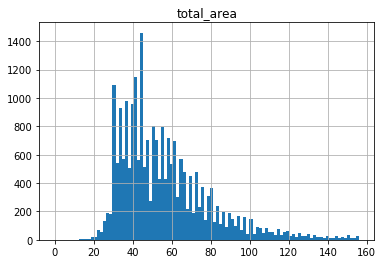

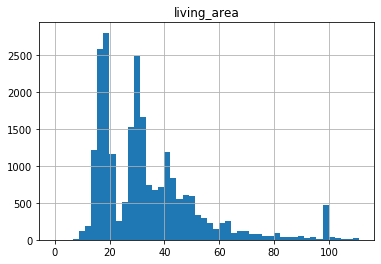

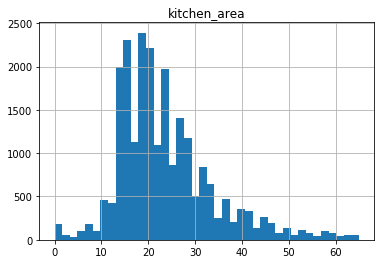

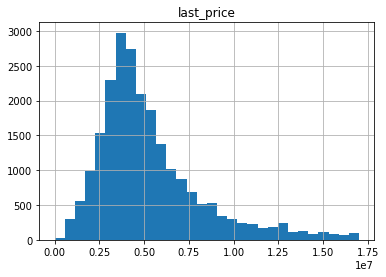

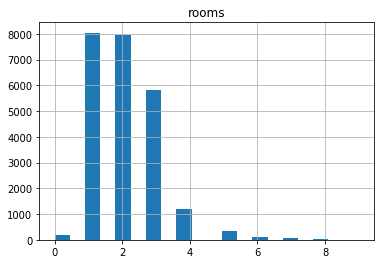

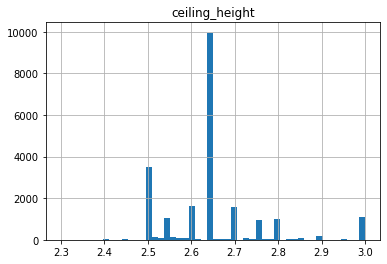

In [22]:
dict_for_hist = {
    
    'total_area': [100],
    'living_area': [50],
    'kitchen_area': [40], 
    'last_price': [30],  
    'rooms': [20],
    'ceiling_height': [50]
}
for column in dict_for_hist:
    quantiles = df[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    df.hist(column, bins =(dict_for_hist[column][0]), range=(max(0, quantiles.iloc[0] - 3*iqr), quantiles.iloc[1] + 3*iqr))
   


### Вывод

Характеристики имеют экстремальные значения. Это видно как по числовому описанию данных, так и по графическому.
- Общая площадь: После 150 м резкий спад и есть отдельные выбросы до 900.
- Жилая площадь: Мощный узкий пик в районе 30 и 20. Единичные значения до 409.
- Площадь кухни: Основная масса варьируется в пределах 5-15. Выбросы в районе 1-2 и узкий хвост после 20-25.
- Цена: также наблюдаем "хвост" высоких значений.
- Комнаты: Широкий пик от 2-4. Узкий хвост после 5 и аномальные значения в районе 0.
- Высота пололков: основная масса значений в районе 2-3 м, отдельные - до 100.<br>
Нужно избавиться от "выбросов", выделяющихся из общей выборки значений, чтобы они не искажали данные при построении автоматизированной системы.
Причины появления могут быть разные: технические проблемы, человеческий фактор (ошибки при вводе данных), уникальные /случайные явления. 



<a id='time_sale'></a>
### Изучение времени продажи квартиры

Среднее время продажи квартиры 181
Медиана 95


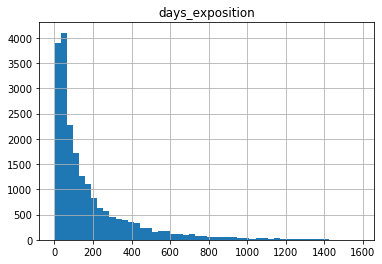

In [23]:
df.hist('days_exposition', bins=50)
print('Среднее время продажи квартиры {:.0f}'.format(df['days_exposition'].mean()))
print('Медиана {:.0f}'.format(df['days_exposition'].median()))

Построим диаграмму размаха времени продажи квартир

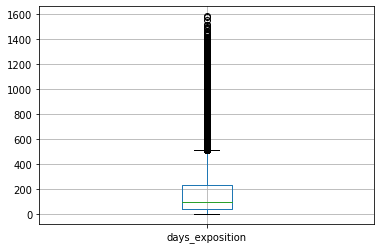

In [24]:
df.boxplot(column='days_exposition')

Большая часть значений лежит в диапазоне до 200 дней и выглядит правдоподобно. Обычно продажа квартиры занимает от 45 до 232 дней. Согласно диаграмме размаха, выбросами считаются значения, которые не попадают в размах "усов". В конкретном случае это диапазон от 0 до 430 (1,5 межквартильного размаха от границ ящика). Все, что выше - выбросы и их достаточно много (слились в линию). Они могут быть связаны с тем, что квартиру продали и забыли снять объявление с продажи. Либо проблемы с документами или необоснованно высокая цена. Просмотрим топ - 10 квартир, которые продавались дольше всего.

In [25]:
df.sort_values(by='days_exposition', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_total,price_per_meter,ratio_kitchen_total,weekday,month,year,group_floor
18843,11,3500000,48,2014-12-15,2,2.50,5.0,27,2,False,False,False,20,3,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.0,0,72916,0.416667,0,12,2014,другой
1109,1,34878556,95,2014-12-09,2,2.65,6.0,58,5,True,False,False,37,1,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0,0,367142,0.389474,1,12,2014,другой
9553,11,10600000,80,2014-12-09,3,2.85,17.0,44,9,False,False,False,36,0,Санкт-Петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553.0,0,132500,0.450000,1,12,2014,другой
1885,2,13300000,79,2014-12-09,2,3.00,8.0,42,7,False,False,False,36,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513.0,0,168354,0.455696,1,12,2014,другой
20969,18,13300000,133,2015-02-11,4,3.00,5.0,58,2,False,False,False,75,0,Санкт-Петербург,24653.0,5032.0,0.0,NaN,1.0,534.0,1512.0,0,100000,0.563910,2,2,2015,другой
6691,3,4400000,42,2014-12-12,1,2.65,5.0,18,1,False,False,False,24,0,Пушкин,19715.0,30358.0,1.0,439.0,3.0,232.0,1512.0,0,104761,0.571429,4,12,2014,первый
14093,7,9500000,100,2015-02-19,4,3.00,5.0,76,5,False,False,False,24,0,Санкт-Петербург,25950.0,4798.0,1.0,690.0,0.0,NaN,1497.0,0,95000,0.240000,3,2,2015,последний
15313,1,9278000,139,2014-12-28,4,2.80,5.0,64,4,False,False,False,75,0,Сестрорецк,54416.0,35515.0,0.0,NaN,0.0,NaN,1489.0,0,66748,0.539568,6,12,2014,другой
19123,9,5990000,82,2015-02-19,3,3.00,4.0,60,2,False,False,False,22,0,Павловск,22465.0,34619.0,0.0,NaN,2.0,458.0,1485.0,0,73048,0.268293,3,2,2015,другой
11955,4,11400000,76,2014-12-09,2,2.65,9.0,36,3,False,False,False,40,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1484.0,0,150000,0.526316,1,12,2014,другой


In [26]:
df.sort_values(by='last_price', ascending=False).head(10)
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод

Чаще всего продажа квартиры занимает от 45 до 232 дней - это межквартильный размах. В диапазон от 0 до 512 дней попадают нормальные значения. Продажа недвижимости свыше 512 дней уже можно считать слишком длительной, а менее 45 дней - быстрыми. Все, что выходит за рамки  - являются выбросами и их можно убрать. Большинство долго продающихся квартир - это недвижимость с высокой стоимостью. Скорее всего она необоснованно завышена, так как топ самых дорогих квартир продавался преимущественно в пределах допустимых значений.

<a id='clean_data'></a>
### Очистка данных

Определяем границы "нормальных" значений. Строим ящик с усами и высчитываем верхнюю и нижнюю границу допустимых значений для каждого параметра с помощью цикла.

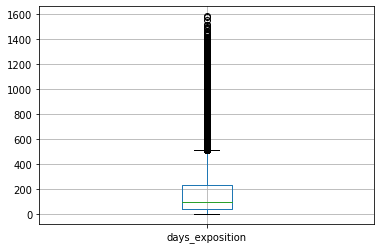

Верхняя граница: days_exposition 512.5
Нижняя граница: 0


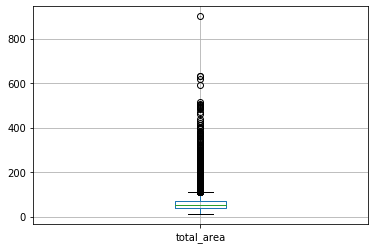

Верхняя граница: total_area 112.5
Нижняя граница: 0


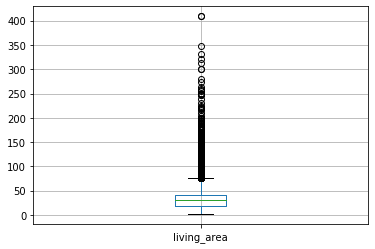

Верхняя граница: living_area 76.5
Нижняя граница: 0


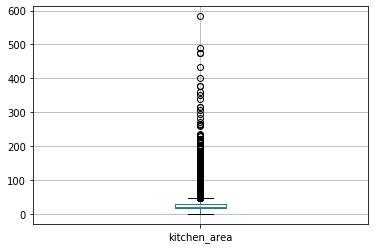

Верхняя граница: kitchen_area 47.0
Нижняя граница: 0


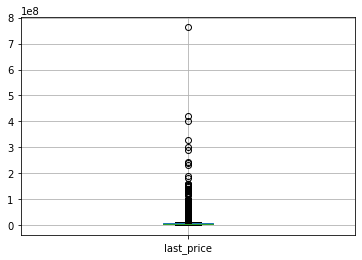

Верхняя граница: last_price 11900000.0
Нижняя граница: 0


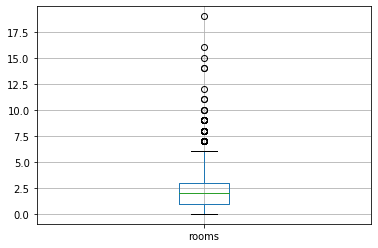

Верхняя граница: rooms 6.0
Нижняя граница: 0


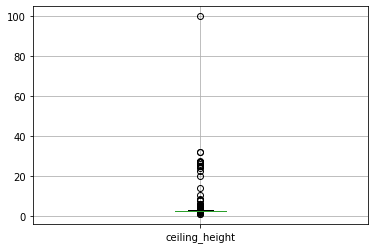

Верхняя граница: ceiling_height 2.8500000000000005
Нижняя граница: 2.45


In [27]:
column_dict= {
    'days_exposition': [-10, 1600],
    'total_area': [-10, 200],
    'living_area': [-10, 200],
    'kitchen_area': [-10, 100],
    'last_price': [-100000, 20000000],
    'rooms': [-1, 19],
    'ceiling_height': [-1, 5]
}
for column in column_dict:
    df.boxplot(column = column)
    (column_dict[column][0], column_dict[column][1])
    plt.show()
    quantiles
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    print('Верхняя граница:', column, quantiles.iloc[1] + iqr*1.5)
    print('Нижняя граница:', max(0, quantiles.iloc[0] - iqr*1.5))

In [28]:
df_new = df.query('0 <= days_exposition <= 430 and 0 <= total_area <= 112.5 and 0 <= living_area <= 74 and 1 <= kitchen_area <= 17 and 0 <= last_price <= 11900000 and 0 <= rooms <= 6 and 2.45 <= ceiling_height <= 2.85').reset_index(drop=True)
df_new


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_total,price_per_meter,ratio_kitchen_total,weekday,month,year,group_floor
0,10,2890000,30,2018-09-10,1,2.65,12.0,14,5,False,False,False,15,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0,96333,0.500000,0,9,2018,другой
1,20,2900000,33,2018-05-23,1,2.65,27.0,15,26,False,False,False,17,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0,87878,0.515152,2,5,2018,другой
2,18,5400000,61,2017-02-26,3,2.50,9.0,43,7,False,False,False,17,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0,88524,0.278689,6,2,2017,другой
3,9,3300000,44,2018-08-27,2,2.65,5.0,31,4,False,False,False,13,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,0,75000,0.295455,0,8,2018,другой
4,20,3550000,42,2017-07-01,2,2.56,5.0,27,5,False,False,False,15,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,0,84523,0.357143,5,7,2017,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,10,3500000,43,2016-05-19,2,2.50,3.0,26,2,False,False,False,16,1,Пушкин,15823.0,27977.0,0.0,NaN,1.0,1134.0,252.0,0,81395,0.372093,3,5,2016,другой
5182,0,2500000,35,2017-12-08,1,2.65,9.0,19,4,False,False,False,15,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0,71428,0.428571,4,12,2017,другой
5183,13,5250000,43,2018-05-11,2,2.50,5.0,29,2,False,False,False,14,0,Санкт-Петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80.0,0,122093,0.325581,4,5,2018,другой
5184,8,3300000,31,2017-04-29,1,2.55,9.0,18,6,False,False,False,13,0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0,0,106451,0.419355,5,4,2017,другой


### Вывод

Почти у всех показателей нижняя граница (ус) упирается в минимальное значение, 0. <br>Мы отфильтровали выбросы, чтобы получить более точную, неискаженную информацию. Но на наличие данного факта нужно сделать акцент и разобраться в причинах (технические ошибки, аномальные явления или мошенническая деятельность) и предотвратить их появление в дальнейшем.

<a id='factors_price'></a>
### Факторы, влияющие на стоимость квартиры

Изучим, влияет ли стоимости квартиры от таких факторов, как площадь, число комнат, удалённости от центра, этаж и даты размещения. Рассчитаем коэффициент корреляции Пирсона

In [29]:
df_new.corr()['last_price'].sort_values()

cityCenters_nearest   -0.342348
ratio_kitchen_total   -0.167613
open_plan             -0.049532
ratio_living_total    -0.048382
days_exposition       -0.039729
airports_nearest      -0.038272
ceiling_height        -0.037192
weekday               -0.007944
month                 -0.007887
ponds_around3000      -0.004173
parks_around3000       0.013926
is_apartment           0.022663
parks_nearest          0.029620
ponds_nearest          0.054762
year                   0.056030
balcony                0.119906
floor                  0.139026
total_images           0.145605
floors_total           0.187355
kitchen_area           0.245712
rooms                  0.324496
living_area            0.370026
total_area             0.423640
price_per_meter        0.710090
last_price             1.000000
studio                      NaN
Name: last_price, dtype: float64

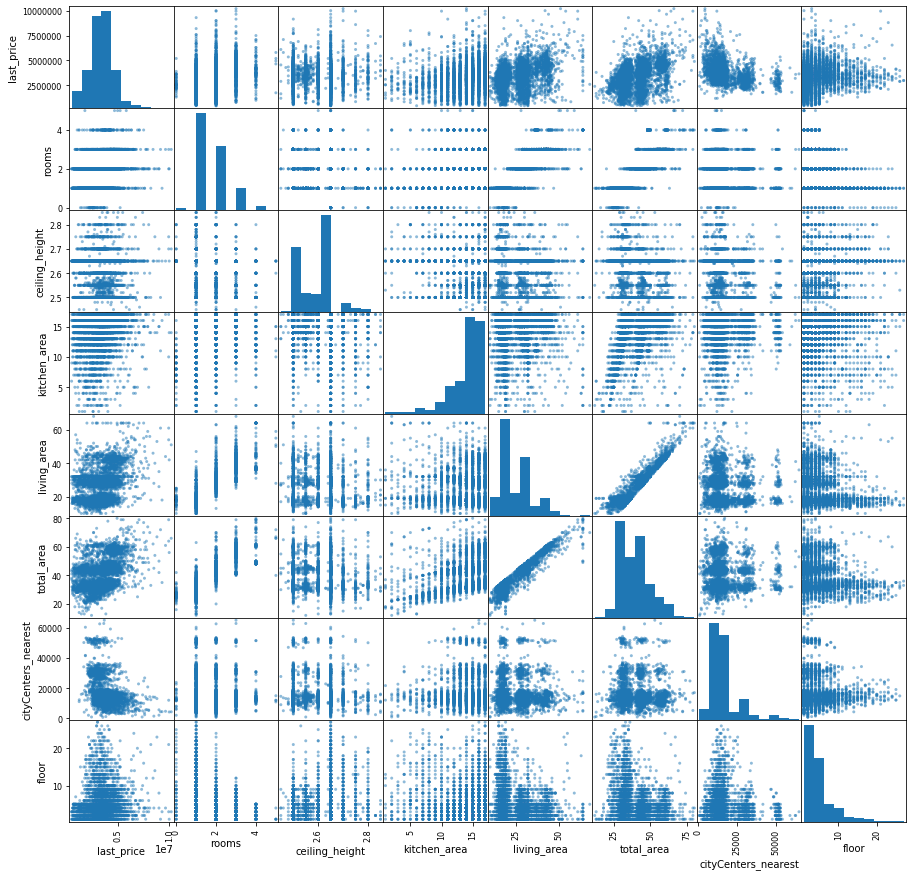

In [30]:
corr = df_new[['last_price', 'rooms', 'ceiling_height', 'kitchen_area', 'living_area', 'total_area', 'cityCenters_nearest', 'floor']]
pd.plotting.scatter_matrix(corr, figsize=(15, 15))
plt.show()

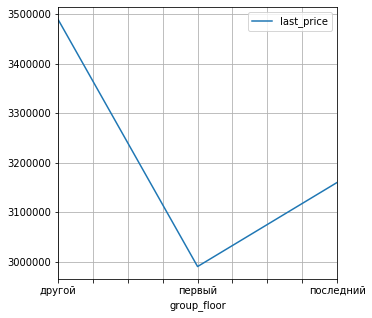

In [31]:
df_new.pivot_table(index='group_floor', values='last_price').plot(grid=True, figsize=(5, 5))


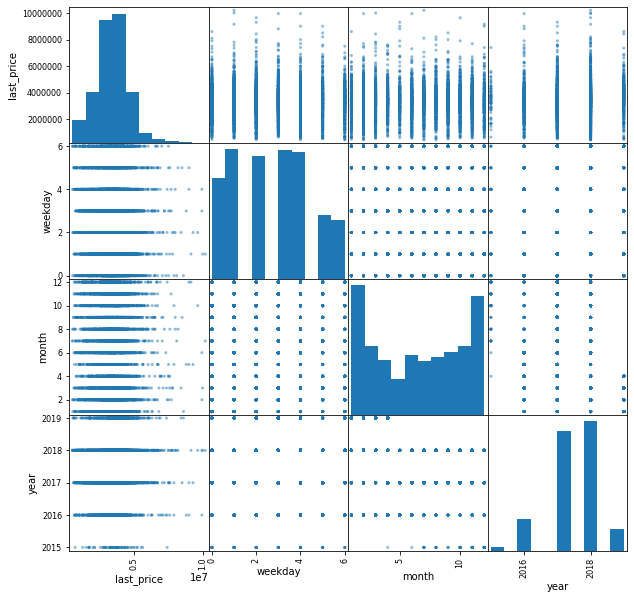

In [32]:
corr = df_new[['last_price','weekday', 'month', 'year']]
pd.plotting.scatter_matrix(corr, figsize=(10, 10))
plt.show()

Виализируем матрицу корреляции с помощью метода heatmap из библиотеки seaborn

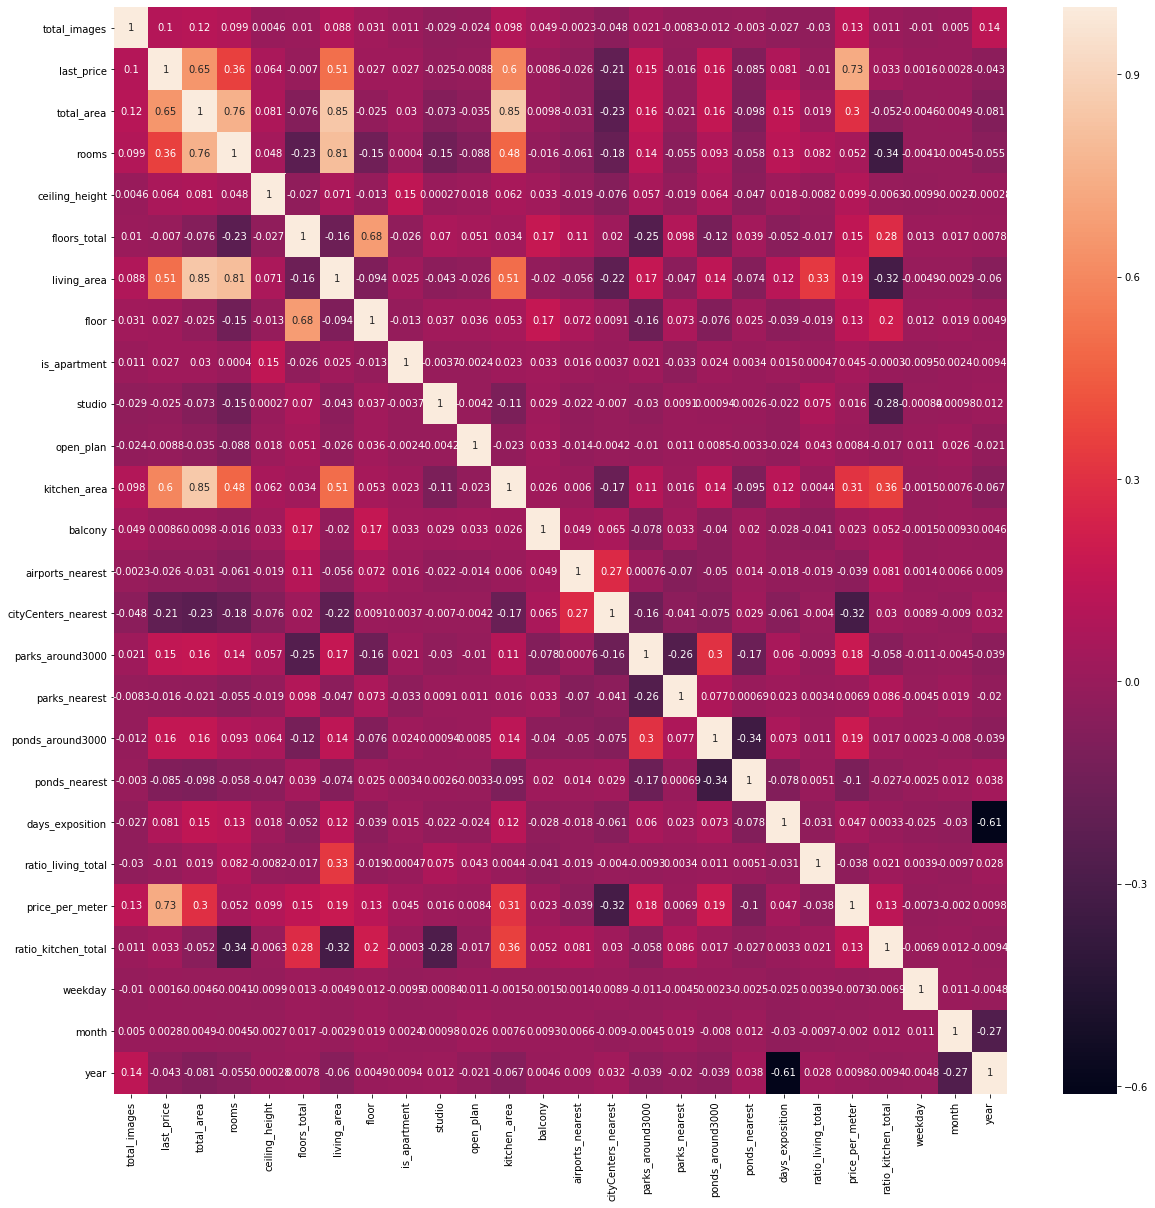

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

### Вывод

Основные параметры, влияющие на цену, изучены. Приведены необходимые графики и значения корреляций. Наибольшее влияние из исследуемых параметров на стоимость недвижимости оказывают общая площадь, жилая, площадь кухни и количество комнат. Остальные параметры в меньшей степени. Квартиры на первом этаже ценятся меньше. Квартиры на последнем этаже тоже уступают по стоимости, но не так явно. Что касается даты размещения: с каждым годом становится больше объявлений о продаже, в т.ч. на квартиры с высокой стоимостью. С месяцем и днем недели различия по стоимости жилья не так явно выражены; каждый месяц в течение недели объявления размещались равномерно. Судя по графику, данные предоставлены с ноября 2014 по май 2019 включительно.

<a id='price_locat'></a>
### Исследование стоимости квартир в населенных пунктах

Самая высокая стоимость жилья - 101409.40294211704
Самая высокая стоимость жилья - 55956.05617977528


,count,price_per_meter
locality_name,,
Санкт-Петербург,3127,101409.402942
посёлок Мурино,143,92618.251748
Колпино,120,77833.833333
Гатчина,99,67739.707071
Выборг,89,55956.056180
Пушкин,80,96195.437500
Петергоф,73,82250.602740
Красное Село,69,74184.797101
посёлок Шушары,68,84696.426471


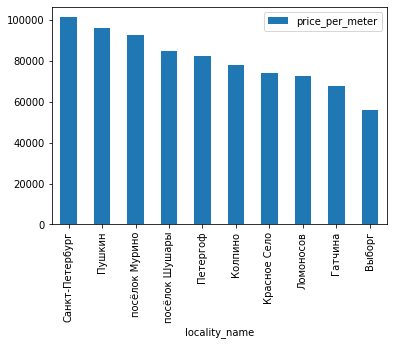

In [34]:
top = df_new.groupby(['locality_name'])[['price_per_meter']].count().head()
top_loc = df_new.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])
top_loc.columns=['count', 'price_per_meter']
top_loc = top_loc.sort_values(by='count', ascending=False).head(10)
top_loc.sort_values(by='price_per_meter', ascending=False).plot(y='price_per_meter', kind='bar')
print('Самая высокая стоимость жилья -', top_loc['price_per_meter'].max())
print('Самая высокая стоимость жилья -', top_loc['price_per_meter'].min())

top_loc

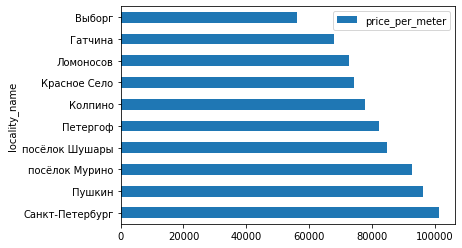

In [35]:
# Код ревьюера
top_loc.sort_values(by='price_per_meter', ascending=False).plot(y='price_per_meter', kind='barh')

### Вывод

В топ- 10 городов с наибольшим числом объявлений о продаже квартиры самая высокая стоимость за квадратный метр, ожидаемо, в Санкт-Петербурге (105096), самая низкая - в Выборге (57760)

<a id='price_center'></a>
### Исследование зависимости стоимости м2 от расстояния до центра

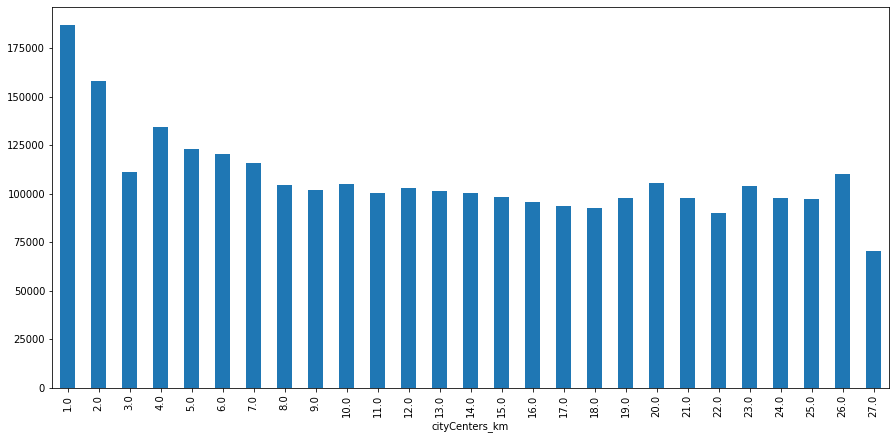

In [36]:
spb = df_new.query('locality_name == "Санкт-Петербург"').copy() 
spb['cityCenters_km'] = (spb['cityCenters_nearest'] / 1000).round()
spb.groupby('cityCenters_km')['price_per_meter'].mean().plot(kind='bar', figsize=(15,7))

### Вывод

В целом, чем дальше от центра, тем ниже средняя стоимость жилья. Можно выделить центральную зону - 8 км, после которой заметен спад в цене за м2.

<a id='research_center'></a>
### Исследование сегмента квартир в центре

Выделим сегмент квартир в центре

In [37]:
center = spb.query('cityCenters_km <= 8')

Изучим параметры: площадь, цена, число комнат, высота потолков и сравним их с параметрами в целом по городу

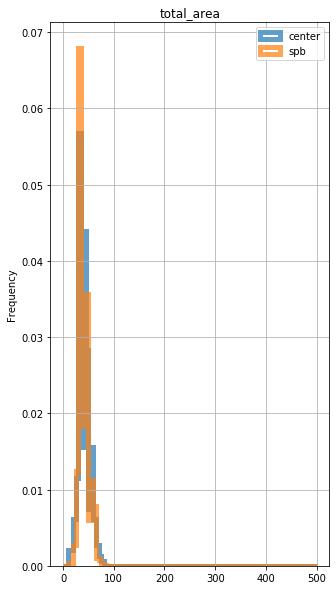

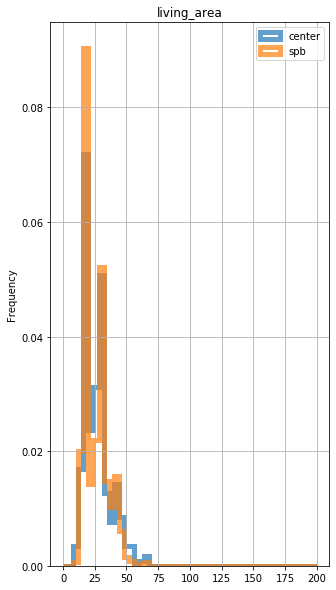

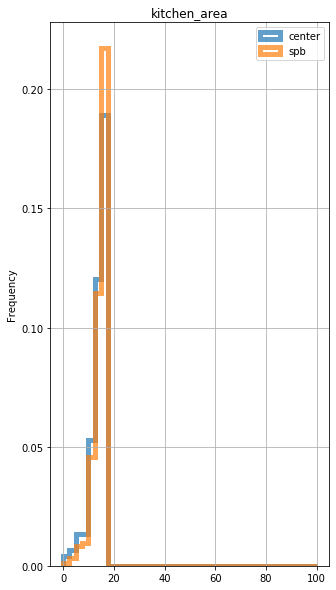

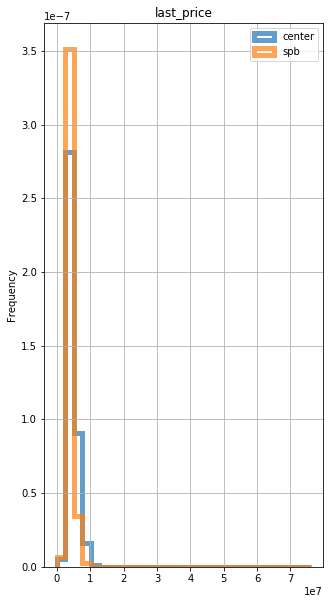

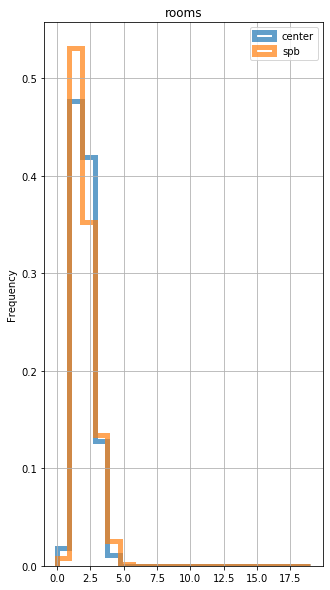

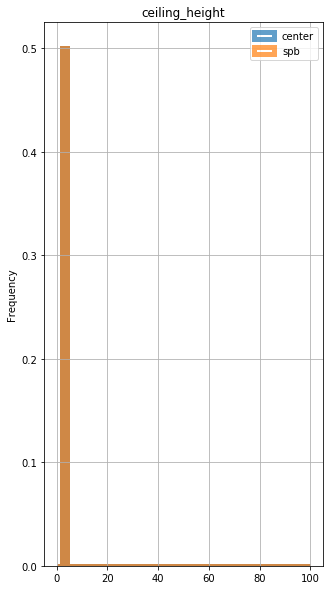

In [38]:
dict_for_plot = {
    
    'total_area': [100, 500],
    'living_area': [50, 200],
    'kitchen_area': [40, 100], 
    'last_price': [30, 76000000],  
    'rooms': [20, 19],
    'ceiling_height': [50, 100]
}
for column in dict_for_plot :
    ax = center.plot(kind='hist', histtype='step', y=column, range=(0, dict_for_plot[column][1]), 
                 bins=(dict_for_plot[column][0]), linewidth=5, alpha=0.7, label='center', density=True)
    spb.plot(kind='hist', y=column, histtype='step', range=(0, dict_for_plot[column][1]), 
         bins=(dict_for_plot[column][0]), linewidth=5, alpha=0.7, label='spb', ax=ax, grid=True, legend=True, title=column, figsize=(5,10), density=True)


Для сегмента "центр" и Санкт-Петербурга распределение параметров схожи. Однако, пик на графике по количеству комнат и стоимости в центре смещен правее (более дорогая недвижимость с бОльшим количеством комнат).

Изучим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления

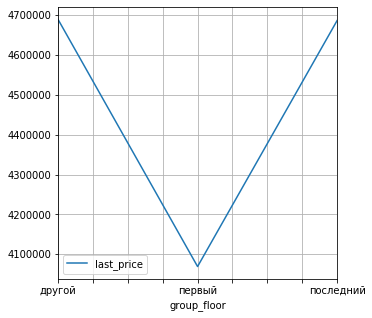

In [39]:
center.pivot_table(index='group_floor', values='last_price').plot(grid=True, figsize=(5, 5))

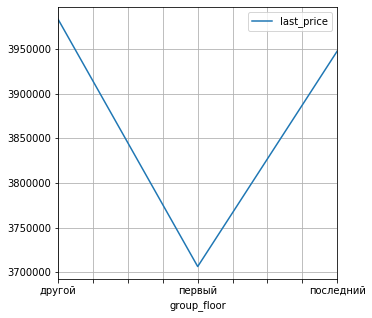

In [40]:
spb.pivot_table(index='group_floor', values='last_price').plot(grid=True, figsize=(5, 5))

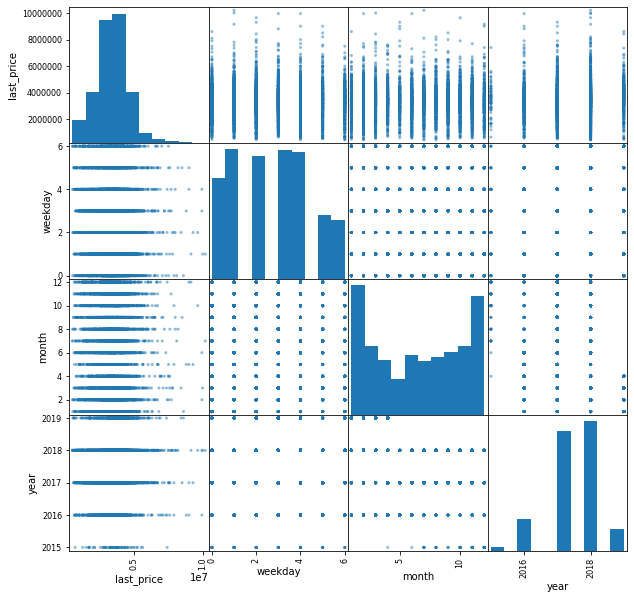

In [41]:
corr_center = center[['last_price','weekday', 'month', 'year']]
pd.plotting.scatter_matrix(corr, figsize=(10, 10))
plt.show()

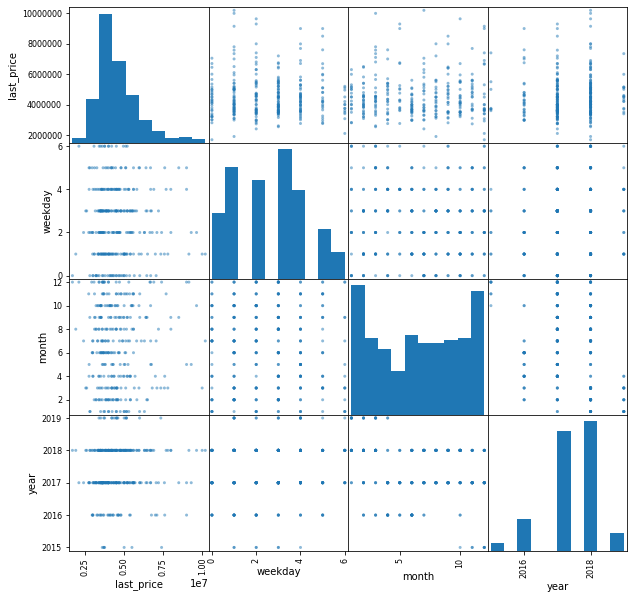

In [42]:
corr_spb = center[['last_price','weekday', 'month', 'year']]
pd.plotting.scatter_matrix(corr_spb, figsize=(10, 10))
plt.show()

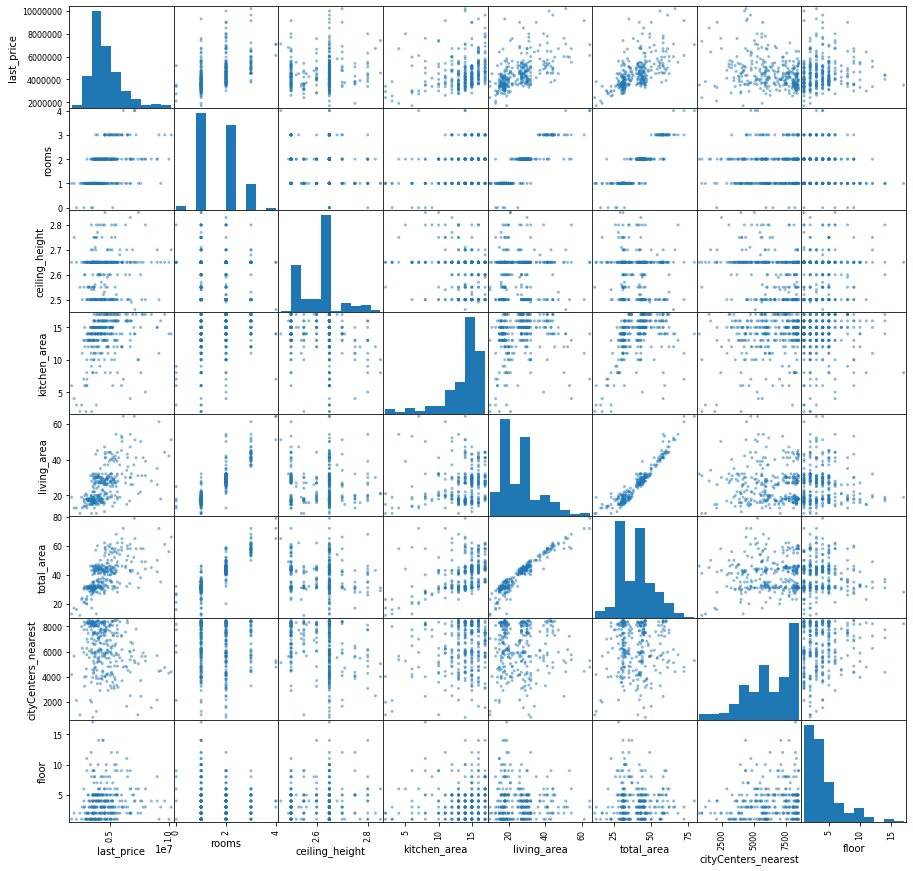

In [43]:
corr_center = center[['last_price', 'rooms', 'ceiling_height', 'kitchen_area', 'living_area', 'total_area', 'cityCenters_nearest', 'floor']]
pd.plotting.scatter_matrix(corr_center, figsize=(15, 15))
plt.show()

In [ ]:
corr_spb = spb[['last_price', 'rooms', 'ceiling_height', 'kitchen_area', 'living_area', 'total_area', 'cityCenters_nearest', 'floor']]
pd.plotting.scatter_matrix(corr_spb , figsize=(15, 15))
plt.show()

Сравним стоимость квадратного метра по Санкт-Петербург и его центру в разрезе параметров:

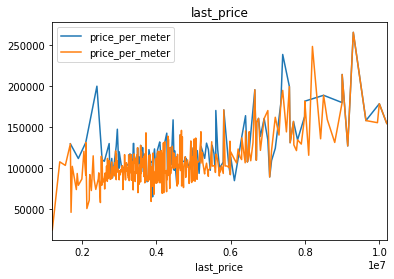

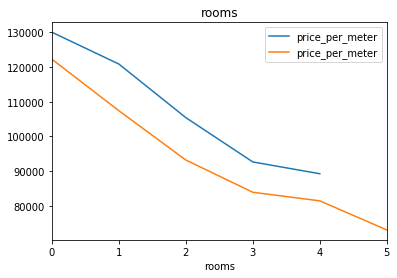

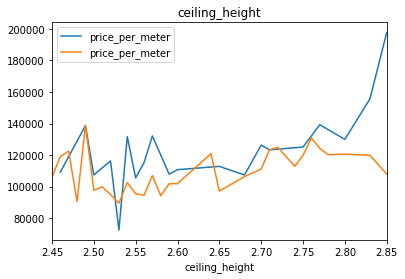

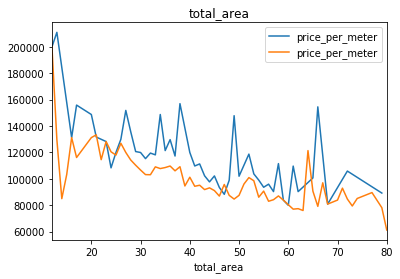

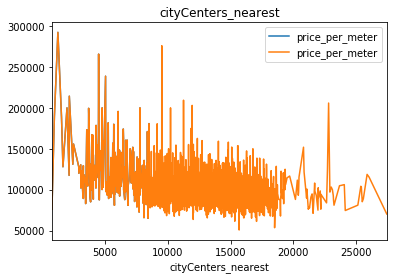

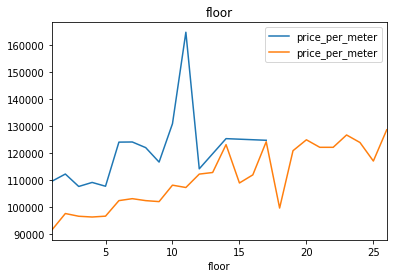

In [45]:
params = ['last_price', 'rooms', 'ceiling_height', 'total_area', 'cityCenters_nearest', 'floor']
for column in params:
    ax = center.pivot_table(index=column, values='price_per_meter', aggfunc = 'median').plot(title=column)
    spb.pivot_table(index=column, values='price_per_meter', aggfunc = 'median').plot(title=column, ax=ax)

Объединим коэффициенты корреляции между стоимостью недвижимости и другими факторами для центрального района, самого города и региона (Санкт-Петербурга и окрестные населенные пункты)

In [46]:
df_corr = pd.DataFrame(center.corr()['last_price'].sort_values()).join(pd.DataFrame(spb.corr()['last_price']),
    lsuffix='_center', rsuffix='_spb')
df_corr =  df_corr.join(pd.DataFrame(df_new.corr()['last_price']))
df_corr.columns=['last_price_center', 'last_price_spb', 'last_price_region']


### Вывод

Для сегмента "центр" и в целом по городу распределение параметров схожи. Имеется тот же самый набор факторов, влияющих на стоимость квартир. Однако, для недвижимости в центре города общая стоимость выше и в меньшей степени зависит от площади кухни, жилой и общей, а также количества комнат и других параметров. Цена квадратного метра в центре максимальная для 1-к квартир и студий, резкий спад до 4-к и повышение цены за метр у элитных 5-к квартир. Для Спб линейная зависимость этих показателей.


<a id='conclusion'></a>
## Общий вывод

В ходе исследования были изучены параметры и факторы, влияющие на стоимость квартир. Определена стоимость недвижимости в населенных пунктах и зависимость от расстояния до центра. Сравнены сегменты центральной части Спб, города в целом и региона. Сильная положительная зависимость между ценой на квартиру и площадью (общей, жилой). В Санкт-Петербурге эта связь проявляется сильнее (0,63, 0,60), чем в центре (0,60 и 0,57) и в регионе в целом(0,42 и 0,37). <br>Аналогичная картина и по количеству комнат - более сильняя корреляция - в Санкт-Петербурге (0,48), а в целом по региону она менее заметна(0,32).<br> Для региона сильная положительная связь - между ценой и стоимостью квадратного метра(0,71). Для Спб и центральных районов города корреляция заметно меньше(0,36 и 0,44 соответственно). <br>Взаимосвязь между расстоянием до центра и ценой квартир в центре города слабая отрицательная и усиливается в разрезе города и региона, что очень логично.
<br>Итоги исследования можно использовать для создания автоматизированной системы оценки рыночной стоимости объектов недвижимости и позволит выявить мошенническую деятельность и аномальные данные.